https://zhuanlan.zhihu.com/p/473403891

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
import autosklearn.regression
import autosklearn.classification

In [4]:
#loading the dataset
df = pd.read_csv("/home/wtian/play_ground/ML/datasets/all_seaborn_built_in_datasets/flights.csv")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
# 使用其他两个特征来预测乘客数量
X=df.drop(["passengers"],axis=1)
y=df["passengers"]
X.shape, y.shape

((144, 2), (144,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((115, 2), (29, 2), (115,), (29,))

In [17]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=300,  # 此任务的最长时间 秒
    per_run_time_limit=30,  # 每个模型评估的时间
    tmp_folder="./tmp",
    memory_limit=10240,  # 设置内存限制为10GB
    n_jobs=30,  # 设置并行任务数量 
)

In [18]:
automl.fit(X_train, y_train)

/home/wtian/miniconda3/envs/py3.8/lib/python3.8/site-packages/autosklearn/data/feature_validator.py:318: UserWarning: Input Column month has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.
  warnings.warn(
/home/wtian/miniconda3/envs/py3.8/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45439 instead
  warnings.warn(
Process pynisher function call:
Traceback (most recent call last):
  File "/home/wtian/miniconda3/envs/py3.8/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/wtian/miniconda3/envs/py3.8/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wtian/miniconda3/envs/py3.8/lib/python3.8/site-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    retu

[WARNING] [2025-03-18 21:52:19,365:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:20,019:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:20,355:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:20,983:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:21,173:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:21,361:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:27,516:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:27,784:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:33,850:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-03-18 21:52:

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     memory_limit=10240, n_jobs=30, per_run_time_limit=30,
                     time_left_for_this_task=300, tmp_folder='./tmp')

In [19]:
# sprint_statistics()函数总结了上述搜索和选择的最佳模型的性能
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 236a6aa5-0400-11f0-a93e-f40270b90ae7
  Metric: r2
  Best validation score: 0.983343
  Number of target algorithm runs: 116
  Number of successful target algorithm runs: 23
  Number of crashed target algorithm runs: 93
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [20]:
# 搜索考虑的所有模型打印排行榜
print(automl.leaderboard())

          rank  ensemble_weight            type      cost  duration
model_id                                                           
116          1             0.92  ard_regression  0.016657  4.199336
103          2             0.06  ard_regression  0.130231  1.149149
95           3             0.02   random_forest  0.506531  1.100669


In [21]:
# 打印有关所考虑模型的信息
print(automl.show_models())

{95: {'model_id': 95, 'rank': 1, 'cost': 0.5065310048849532, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7e489f1f19a0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7e489f50aa30>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7e489f50a9a0>, 'sklearn_regressor': RandomForestRegressor(bootstrap=False, max_features=0.29645304261538463,
                      min_samples_leaf=19, min_samples_split=8,
                      n_estimators=512, n_jobs=1, random_state=1,
                      warm_start=True)}, 103: {'model_id': 103, 'rank': 2, 'cost': 0.1302309955284524, 'ensemble_weight': 0.06, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7e489f506fa0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.Featu

In [22]:
y_pred = automl.predict(X_test)
print("Mean Absolute Error: %.2f" % metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 11.25


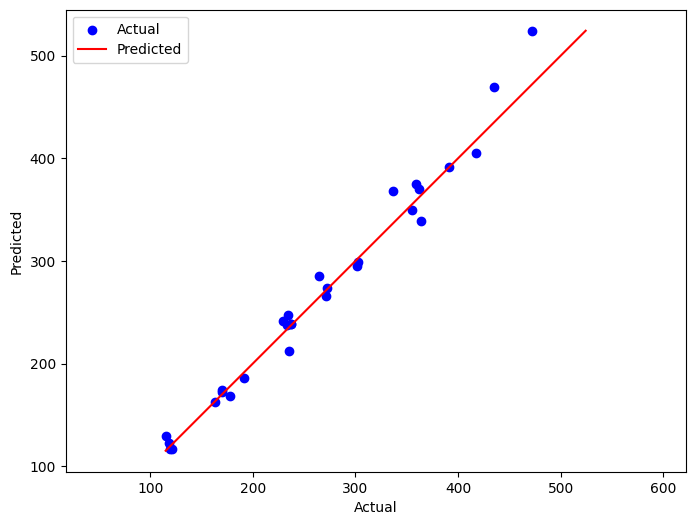

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.legend(['Actual', 'Predicted'])
plt.axis('equal')
plt.show()

Pickle保存和加载模型

In [ ]:
import pickle
# save the model 
filename = 'final_model.sav' 
pickle.dump(model, open(filename, 'wb'))

#load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

JobLib保存和加载模型

In [ ]:
import joblib
# save the model 
filename = 'final_model.sav'
joblib.dump(model, filename)

In [ ]:
# load the model from disk
load_model = joblib.load(filename)
result = load_model.score(X_test, Y_test)
print(result)